<a href="https://colab.research.google.com/github/2021BUSTER/deep-learning_yerin/blob/main/20_1%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 데이터 준비
from google.colab import files
uploaded = files.upload()

my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip

Saving colab_train_test.zip to colab_train_test (3).zip
Archive:  colab_train_test.zip
replace test/ad/ad_test_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test/ad/ad_test_1.jpg   
replace test/ad/ad_test_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test/ad/ad_test_10.jpg  
replace test/ad/ad_test_11.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: t

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [17]:
np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,          #범위 0~255 -> 0~1
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가
                                  width_shift_range=0.1,    #전체 크기의 10% 범위에서 좌우로 이동
                                  height_shift_range=0.1,   #전체 크기의 10% 범위에서 위, 아래로 이동
                                  fill_mode='nearest')      #이미지 변형 시 생기는 빈공간을 채우는 방식 선택(nearest가 가장 비슷한 색으로 채워줌)

train_generator = train_datagen.flow_from_directory(
       'train',                 #학습셋이 있는 폴더의 위치
       target_size=(150, 150),  #이미지 크기
       batch_size=5,
       class_mode='binary')     #2진 분류이므로 binary 모드로 설정

#테스트셋은 이미지 변형을 시키지 않음
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       'test',                  #테스트셋이 있는 폴더의 위치
       target_size=(150, 150),  #이미지 크기
       batch_size=5,
       class_mode='binary')     #2진 분류이므로 binary 모드로 설정


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [22]:
# CNN 모델 적용
model = Sequential()

#커널 수 32개, 커널 사이즈 3x3, input_shape = (행,열,색상(3:컬러))
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #Maxpooling을 사용하여 전체 사이즈를 축소

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#모델 컴파일 
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0002), 
              metrics=['accuracy'])

#모델 실행
history = model.fit_generator(
       train_generator,
       steps_per_epoch=30, 
       epochs=50,   
       validation_data=test_generator,
       validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30/30 [==============================] - 6s 179ms/step - loss: 0.6995 - accuracy: 0.4961 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 2/50
30/30 [==============================] - 5s 174ms/step - loss: 0.6946 - accuracy: 0.5423 - val_loss: 0.6862 - val_accuracy: 0.5000
Epoch 3/50
30/30 [==============================] - 5s 173ms/step - loss: 0.6847 - accuracy: 0.6385 - val_loss: 0.6846 - val_accuracy: 0.6800
Epoch 4/50
30/30 [==============================] - 5s 174ms/step - loss: 0.6855 - accuracy: 0.5604 - val_loss: 0.6659 - val_accuracy: 0.6600
Epoch 5/50
30/30 [==============================] - 5s 174ms/step - loss: 0.6825 - accuracy: 0.5510 - val_loss: 0.6681 - val_accuracy: 0.5200
Epoch 6/50
30/30 [==============================] - 5s 173ms/step - loss: 0.6734 - accuracy: 0.6084 - val_loss: 0.6400 - val_accuracy: 0.6800
Epoch 7/50
30/30 [==============================] - 5s 173ms/step - loss: 0.6462 - accuracy: 0.6738 - val_loss: 0.7015 - val_accuracy: 0.4000
Epoch 

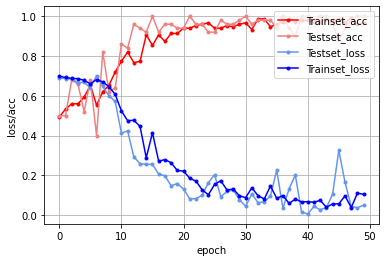

In [23]:
#결과를 그래프로 표현
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()